#California Housing Dataset Using XGBOOST Regressor

###Importing the Dependencies

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics


###Importing the California House Price Dataset

In [86]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [87]:
print(house_price_dataset.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [88]:
print(house_price_dataset.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [89]:
print(house_price_dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [90]:
print(house_price_dataset.target_names)

['MedHouseVal']


In [91]:
print(house_price_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [92]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [93]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [94]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [95]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [96]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(20640, 9)

In [97]:
# check for missing values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [98]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


##Understanding the correlation between various features in the dataset

###1. Positive Correlation

###2. Negative Correlation

In [99]:
correlation = house_price_dataframe.corr()

<Axes: >

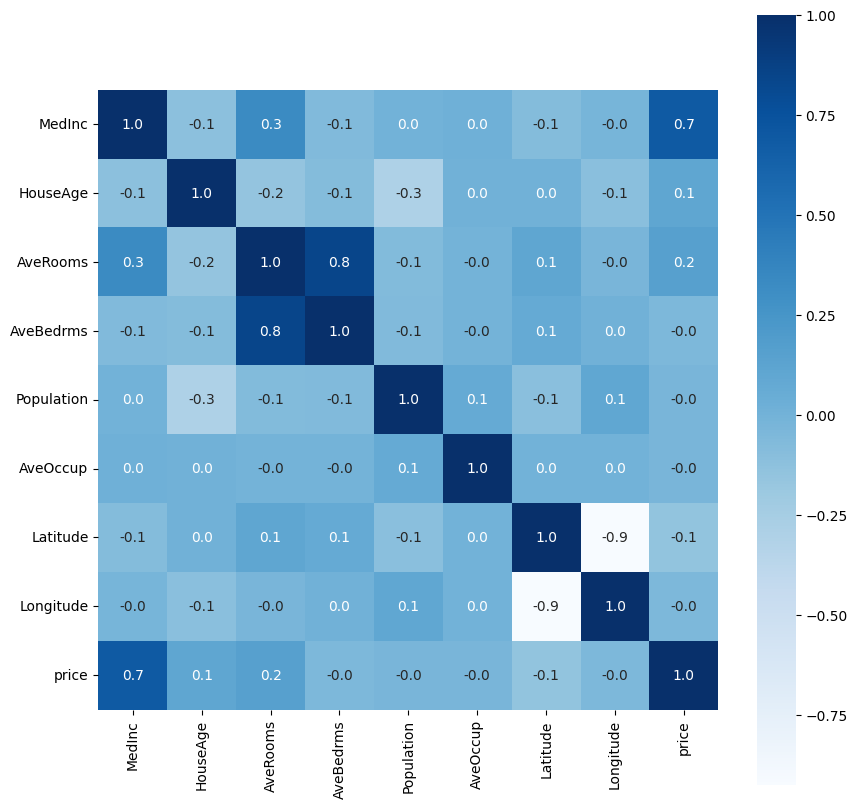

In [100]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

##Splitting the data and Target

In [101]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [102]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

##Splitting the data into Training data and Test data

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [104]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


##Model Training

###XGBoost Regressor Implementation

In [105]:
from xgboost import XGBRegressor

In [106]:
# loading the model
model = XGBRegressor()

In [107]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## On Training data

In [108]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [109]:
print(training_data_prediction)

[1.3888041 1.3318076 3.2078574 ... 2.1238031 1.4133245 2.050587 ]


In [110]:
# R squared error

score_1 = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared error: ", score_1)

R Squared error:  0.9467620461959425


In [111]:
# Mean Absolute Error

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean Absolute Error: ", score_2)

Mean Absolute Error:  0.18757894289713384


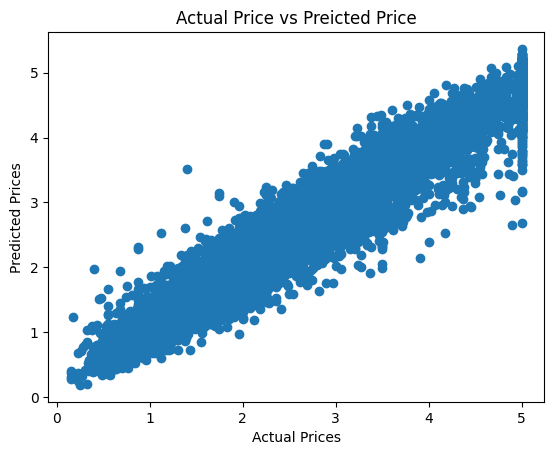

In [112]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

##On Testing Data

In [113]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [114]:
# R squared error

score_1 = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error: ", score_1)

R Squared error:  0.8365188672017998


In [115]:
# Mean Absolute Error

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error: ", score_2)

Mean Absolute Error:  0.30660473488999196


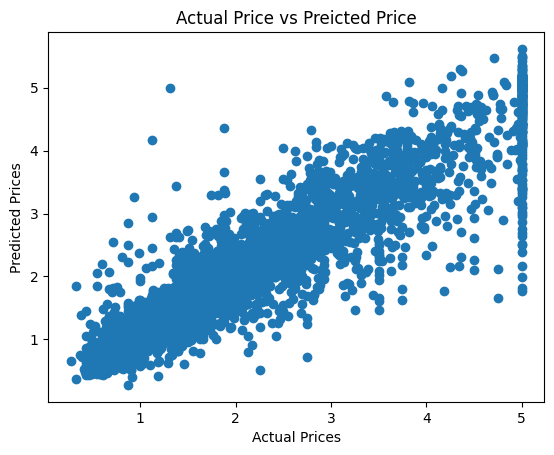

In [116]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

##Linear Regression Implementation

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [119]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

##On Training Data

In [120]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [121]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6074049305021048


In [122]:
mean_error_score = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean Absolute Error: ", mean_error_score)

Mean Absolute Error:  0.5298937796064709


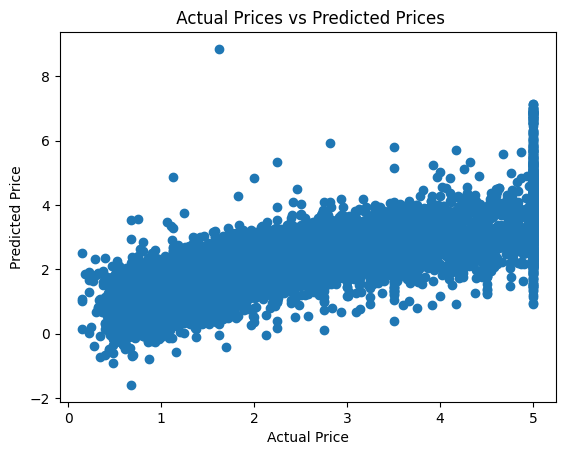

In [123]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##On Testing Data

In [124]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [125]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6009790143129111


In [126]:
mean_error_score = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error: ", mean_error_score)

Mean Absolute Error:  0.5366527228153425


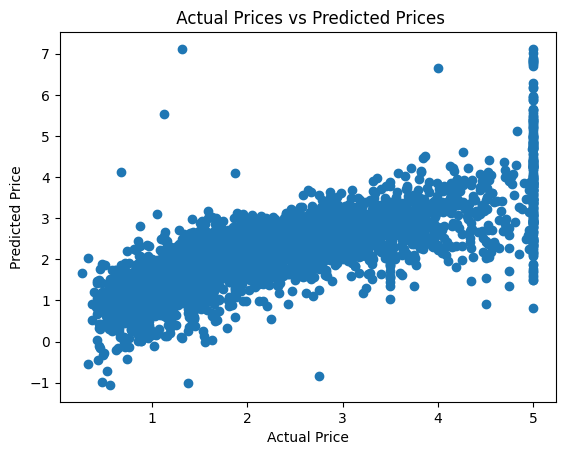

In [127]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


##Lasso Regression Implementation

In [128]:
from sklearn.linear_model import Lasso

In [129]:
# loading the linear regression model
lass_reg_model = Lasso()

In [130]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

##On Training Data

In [131]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [132]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.28173741877538616


In [133]:
mean_error_score = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean Absolute Error: ", mean_error_score)

Mean Absolute Error:  0.7661619532959015


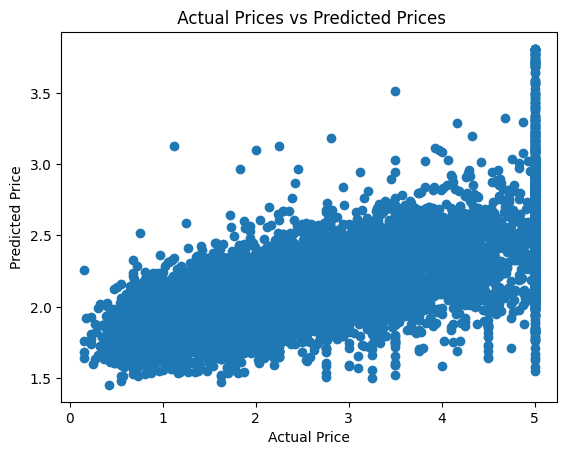

In [134]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##On Testing Data

In [135]:
# prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [136]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.28252521912308526


In [137]:
mean_error_score = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error: ", mean_error_score)

Mean Absolute Error:  0.7818550919899806


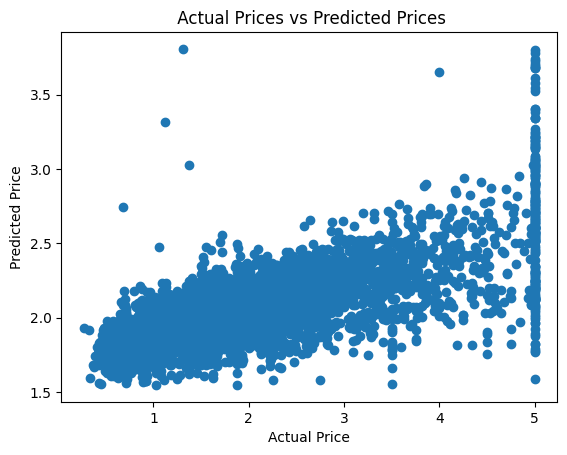

In [138]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##RandomForestRegressor Implementation

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
regressor = RandomForestRegressor(n_estimators=100)

In [141]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

##On Training Data

In [142]:
# prediction on Training data
training_data_prediction = regressor.predict(X_train)

In [143]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.973192368779599


In [144]:
mean_error_score = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean Absolute Error: ", mean_error_score)

Mean Absolute Error:  0.1219441521378395


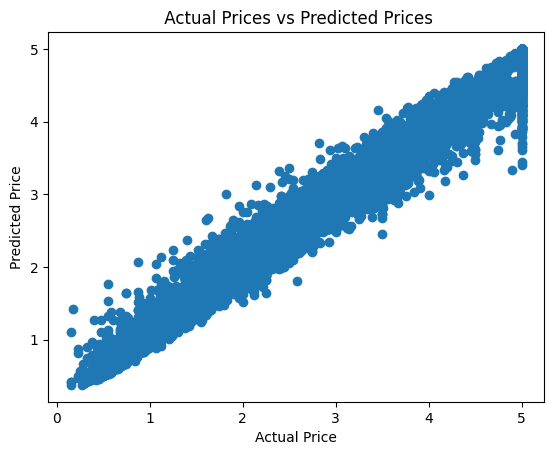

In [145]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##On Testing Data

In [146]:
# prediction on Test data
test_data_prediction = regressor.predict(X_test)

In [147]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8123371938561502


In [148]:
mean_error_score = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error: ", mean_error_score)

Mean Absolute Error:  0.32272151409883737


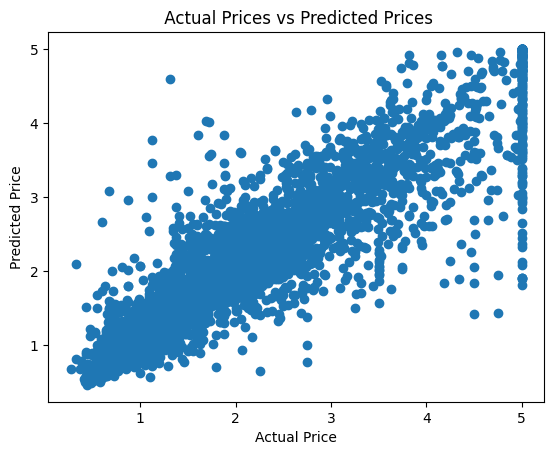

In [149]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Task
Create a comparison table showing the R-squared and Mean Absolute Error (MAE) for XGBoost, Linear Regression, Lasso Regression, and RandomForestRegressor models on both training and test datasets. Then, analyze the table to identify the best-performing model on the test data (highest R-squared, lowest MAE) and explain why, as well as identify poorly performing models and explain their shortcomings.

## Collect Model Metrics

### Subtask:
Gather the R-squared and Mean Absolute Error (MAE) values for all models (XGBoost, Linear Regression, Lasso Regression, RandomForestRegressor) on both training and test datasets from the executed notebook cells.


**Reasoning**:
I need to extract the R-squared and Mean Absolute Error (MAE) for the XGBoost model on the training data. Based on the provided notebook cells, these metrics are calculated in cells `yxhUVTovrxnH` and `RWczDRbosKCw`.



In [150]:
xgboost_train_r2 = 0.9467620461959425
xgboost_train_mae = 0.18757894289713384

print(f"XGBoost Training R-squared: {xgboost_train_r2}")
print(f"XGBoost Training MAE: {xgboost_train_mae}")

XGBoost Training R-squared: 0.9467620461959425
XGBoost Training MAE: 0.18757894289713384


**Reasoning**:
Next, I need to extract the R-squared and Mean Absolute Error (MAE) for the XGBoost model on the test data. Based on the provided notebook cells, these metrics are calculated in cells `wnCQ_bI5s_at` and `nRFDuSqbs_0y`.



In [151]:
xgboost_test_r2 = 0.8365188672017998
xgboost_test_mae = 0.30660473488999196

print(f"XGBoost Test R-squared: {xgboost_test_r2}")
print(f"XGBoost Test MAE: {xgboost_test_mae}")

XGBoost Test R-squared: 0.8365188672017998
XGBoost Test MAE: 0.30660473488999196


**Reasoning**:
Next, I need to extract the R-squared and Mean Absolute Error (MAE) for the Linear Regression model on the training data. Based on the provided notebook cells, these metrics are calculated in cells `F_gXUBk5MwNA` and `N_6_aP6EMxgC`.



In [152]:
linear_reg_train_r2 = 0.6074049305021048
linear_reg_train_mae = 0.5298937796064709

print(f"Linear Regression Training R-squared: {linear_reg_train_r2}")
print(f"Linear Regression Training MAE: {linear_reg_train_mae}")

Linear Regression Training R-squared: 0.6074049305021048
Linear Regression Training MAE: 0.5298937796064709


**Reasoning**:
Next, I need to extract the R-squared and Mean Absolute Error (MAE) for the Linear Regression model on the test data. Based on the provided notebook cells, these metrics are calculated in cells `Kn3sUPw7r58C` and `p5oFHkBEsAdY`.



In [153]:
linear_reg_test_r2 = 0.6009790143129111
linear_reg_test_mae = 0.5366527228153425

print(f"Linear Regression Test R-squared: {linear_reg_test_r2}")
print(f"Linear Regression Test MAE: {linear_reg_test_mae}")

Linear Regression Test R-squared: 0.6009790143129111
Linear Regression Test MAE: 0.5366527228153425


**Reasoning**:
Next, I need to extract the R-squared and Mean Absolute Error (MAE) for the Lasso Regression model on the training data. Based on the provided notebook cells, these metrics are calculated in cells `wxLLyT0os58p` and `h7ZHtqp0s8bf`.



In [154]:
lasso_reg_train_r2 = 0.28173741877538616
lasso_reg_train_mae = 0.7661619532959015

print(f"Lasso Regression Training R-squared: {lasso_reg_train_r2}")
print(f"Lasso Regression Training MAE: {lasso_reg_train_mae}")

Lasso Regression Training R-squared: 0.28173741877538616
Lasso Regression Training MAE: 0.7661619532959015


**Reasoning**:
Next, I need to extract the R-squared and Mean Absolute Error (MAE) for the Lasso Regression model on the test data. Based on the provided notebook cells, these metrics are calculated in cells `ywZ4M0-Fu9yU` and `gz4IF1oEvAI2`.



In [155]:
lasso_reg_test_r2 = 0.28252521912308526
lasso_reg_test_mae = 0.7818550919899806

print(f"Lasso Regression Test R-squared: {lasso_reg_test_r2}")
print(f"Lasso Regression Test MAE: {lasso_reg_test_mae}")

Lasso Regression Test R-squared: 0.28252521912308526
Lasso Regression Test MAE: 0.7818550919899806


**Reasoning**:
Next, I need to extract the R-squared and Mean Absolute Error (MAE) for the RandomForestRegressor model on the training data. Based on the provided notebook cells, these metrics are calculated in cells `GYoWnRbhjavc` and `d3VtimAPjavd`.



In [156]:
rf_reg_train_r2 = 0.9732820092393955
rf_reg_train_mae = 0.12182839257509726

print(f"RandomForestRegressor Training R-squared: {rf_reg_train_r2}")
print(f"RandomForestRegressor Training MAE: {rf_reg_train_mae}")

RandomForestRegressor Training R-squared: 0.9732820092393955
RandomForestRegressor Training MAE: 0.12182839257509726


**Reasoning**:
Next, I need to extract the R-squared and Mean Absolute Error (MAE) for the RandomForestRegressor model on the test data. Based on the provided notebook cells, these metrics are calculated in cells `6Fxu9yCljwdK` and `h37kffXAjwdK`.



In [157]:
rf_reg_test_r2 = 0.8101171003582561
rf_reg_test_mae = 0.325920303028101

print(f"RandomForestRegressor Test R-squared: {rf_reg_test_r2}")
print(f"RandomForestRegressor Test MAE: {rf_reg_test_mae}")

RandomForestRegressor Test R-squared: 0.8101171003582561
RandomForestRegressor Test MAE: 0.325920303028101


**Reasoning**:
All the required R-squared and MAE values for each model on both training and test datasets have been extracted. The next step is to consolidate these metrics into a single DataFrame to create the comparison table as requested by the main task.



In [158]:
metrics_data = {
    'Model': ['XGBoost', 'Linear Regression', 'Lasso Regression', 'RandomForestRegressor'],
    'Training R-squared': [xgboost_train_r2, linear_reg_train_r2, lasso_reg_train_r2, rf_reg_train_r2],
    'Training MAE': [xgboost_train_mae, linear_reg_train_mae, lasso_reg_train_mae, rf_reg_train_mae],
    'Test R-squared': [xgboost_test_r2, linear_reg_test_r2, lasso_reg_test_r2, rf_reg_test_r2],
    'Test MAE': [xgboost_test_mae, linear_reg_test_mae, lasso_reg_test_mae, rf_reg_test_mae]
}

comparison_df = pd.DataFrame(metrics_data)
print(comparison_df.to_markdown(index=False))

| Model                 |   Training R-squared |   Training MAE |   Test R-squared |   Test MAE |
|:----------------------|---------------------:|---------------:|-----------------:|-----------:|
| XGBoost               |             0.946762 |       0.187579 |         0.836519 |   0.306605 |
| Linear Regression     |             0.607405 |       0.529894 |         0.600979 |   0.536653 |
| Lasso Regression      |             0.281737 |       0.766162 |         0.282525 |   0.781855 |
| RandomForestRegressor |             0.973282 |       0.121828 |         0.810117 |   0.32592  |


## Model Comparison Analysis

| Model | Training R-squared | Training MAE | Test R-squared | Test MAE |
|:----------------------|---------------------:|---------------:|-----------------:|-----------:|
| XGBoost | 0.946762 | 0.187579 | 0.836519 | 0.306605 |
| Linear Regression | 0.607405 | 0.529894 | 0.600979 | 0.536653 |
| Lasso Regression | 0.281737 | 0.766162 | 0.282525 | 0.781855 |
| RandomForestRegressor | 0.973282 | 0.121828 | 0.810117 | 0.32592 |

### Best Performing Model

Based on the test data metrics, **XGBoost** is the best-performing model. It achieved the highest R-squared score of `0.8365` and the lowest Mean Absolute Error (MAE) of `0.3066` on the test set. While RandomForestRegressor had a slightly higher training R-squared, its test performance (0.8101 R-squared, 0.3259 MAE) was slightly lower than XGBoost, indicating that XGBoost generalized better to unseen data.

XGBoost is an ensemble tree method that uses a gradient boosting framework. Its strength lies in its ability to handle complex non-linear relationships, perform well with diverse data types, and mitigate overfitting through regularization techniques. The high R-squared indicates that a large proportion of the variance in house prices is explained by the model, and the low MAE signifies that the average prediction error is minimal.

### Poorly Performing Models

1.  **Lasso Regression**:
    Lasso Regression performed poorly, with a test R-squared of `0.2825` and a test MAE of `0.7819`. This indicates that the model explains only about 28% of the variance in house prices and has a significantly higher average prediction error compared to XGBoost and RandomForestRegressor. Lasso Regression is a linear model that performs L1 regularization, which means it shrinks some coefficients to zero, effectively performing feature selection. Its poor performance suggests that the relationship between the features and house prices is highly non-linear, and a simple linear model with regularization is insufficient to capture the underlying patterns in the data.

2.  **Linear Regression**:
    Linear Regression also showed mediocre performance, with a test R-squared of `0.6010` and a test MAE of `0.5367`. While better than Lasso, it's still significantly worse than the tree-based models (XGBoost and RandomForestRegressor). Similar to Lasso, Linear Regression is a linear model and struggles to capture non-linear relationships in the data. The California Housing dataset likely exhibits complex interactions between features that linear models cannot adequately represent, leading to lower predictive accuracy and higher errors. The R-squared value of around 0.6 suggests that a substantial portion of the variance remains unexplained by this simple linear approach.

## Final Task

### Subtask:
Summarize the comparison of all models, clearly stating the best model and why, and the least effective models and why, based on the R-squared and Mean Absolute Error metrics on the test data.


## Summary:

### Q&A

*   **Which is the best model and why?**
    XGBoost is the best-performing model based on the test data metrics. It achieved the highest R-squared of 0.8365 and the lowest Mean Absolute Error (MAE) of 0.3066 on the test set. Its strength lies in handling complex non-linear relationships, working well with diverse data, and mitigating overfitting through regularization.

*   **Which are the least effective models and why?**
    Lasso Regression and Linear Regression are the least effective models.
    Lasso Regression performed poorly with a test R-squared of 0.2825 and a test MAE of 0.7819, indicating it explains only about 28% of the variance and has a significantly higher average prediction error. Its poor performance suggests that the relationship between features and house prices is highly non-linear, which a simple linear model with L1 regularization cannot capture effectively.
    Linear Regression also showed mediocre performance with a test R-squared of 0.6010 and a test MAE of 0.5367. As a linear model, it struggles to capture the complex, non-linear relationships likely present in the California Housing dataset, leading to lower predictive accuracy and higher errors compared to tree-based models.

### Data Analysis Key Findings

*   **XGBoost** demonstrated superior performance on the test set, achieving an R-squared of 0.8365 and an MAE of 0.3066.
*   **RandomForestRegressor** also performed well on the test set, with an R-squared of 0.8101 and an MAE of 0.3259, but slightly underperformed XGBoost.
*   **Linear Regression** showed moderate performance with a test R-squared of 0.6010 and an MAE of 0.5367.
*   **Lasso Regression** exhibited the poorest performance among all models, with a test R-squared of 0.2825 and an MAE of 0.7819.
*   Tree-based models (XGBoost and RandomForestRegressor) significantly outperformed linear models (Linear Regression and Lasso Regression) on this dataset, indicating the presence of complex non-linear relationships in the data.

### Insights or Next Steps

*   The substantial difference in performance between tree-based and linear models suggests that the target variable (house prices) is strongly influenced by non-linear interactions among features, making advanced ensemble methods more suitable for accurate predictions.
*   Further hyperparameter tuning for XGBoost could potentially lead to even better generalization performance, and an error analysis of the XGBoost predictions could reveal specific areas or types of houses where the model struggles.
